## Multiple Linear Regression - Case Study

### 1. Importing and Understanding Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Importing CarPrice_Assignment.csv
car_price_df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Look at the head
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# look at the info
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### The dataset is complete without any null values in any of the columns

In [6]:
# Let's drop the car_ID column as we won't use it for the analysis
car_price_df = car_price_df.drop(['car_ID'], axis=1)

### 2. Visualization of data

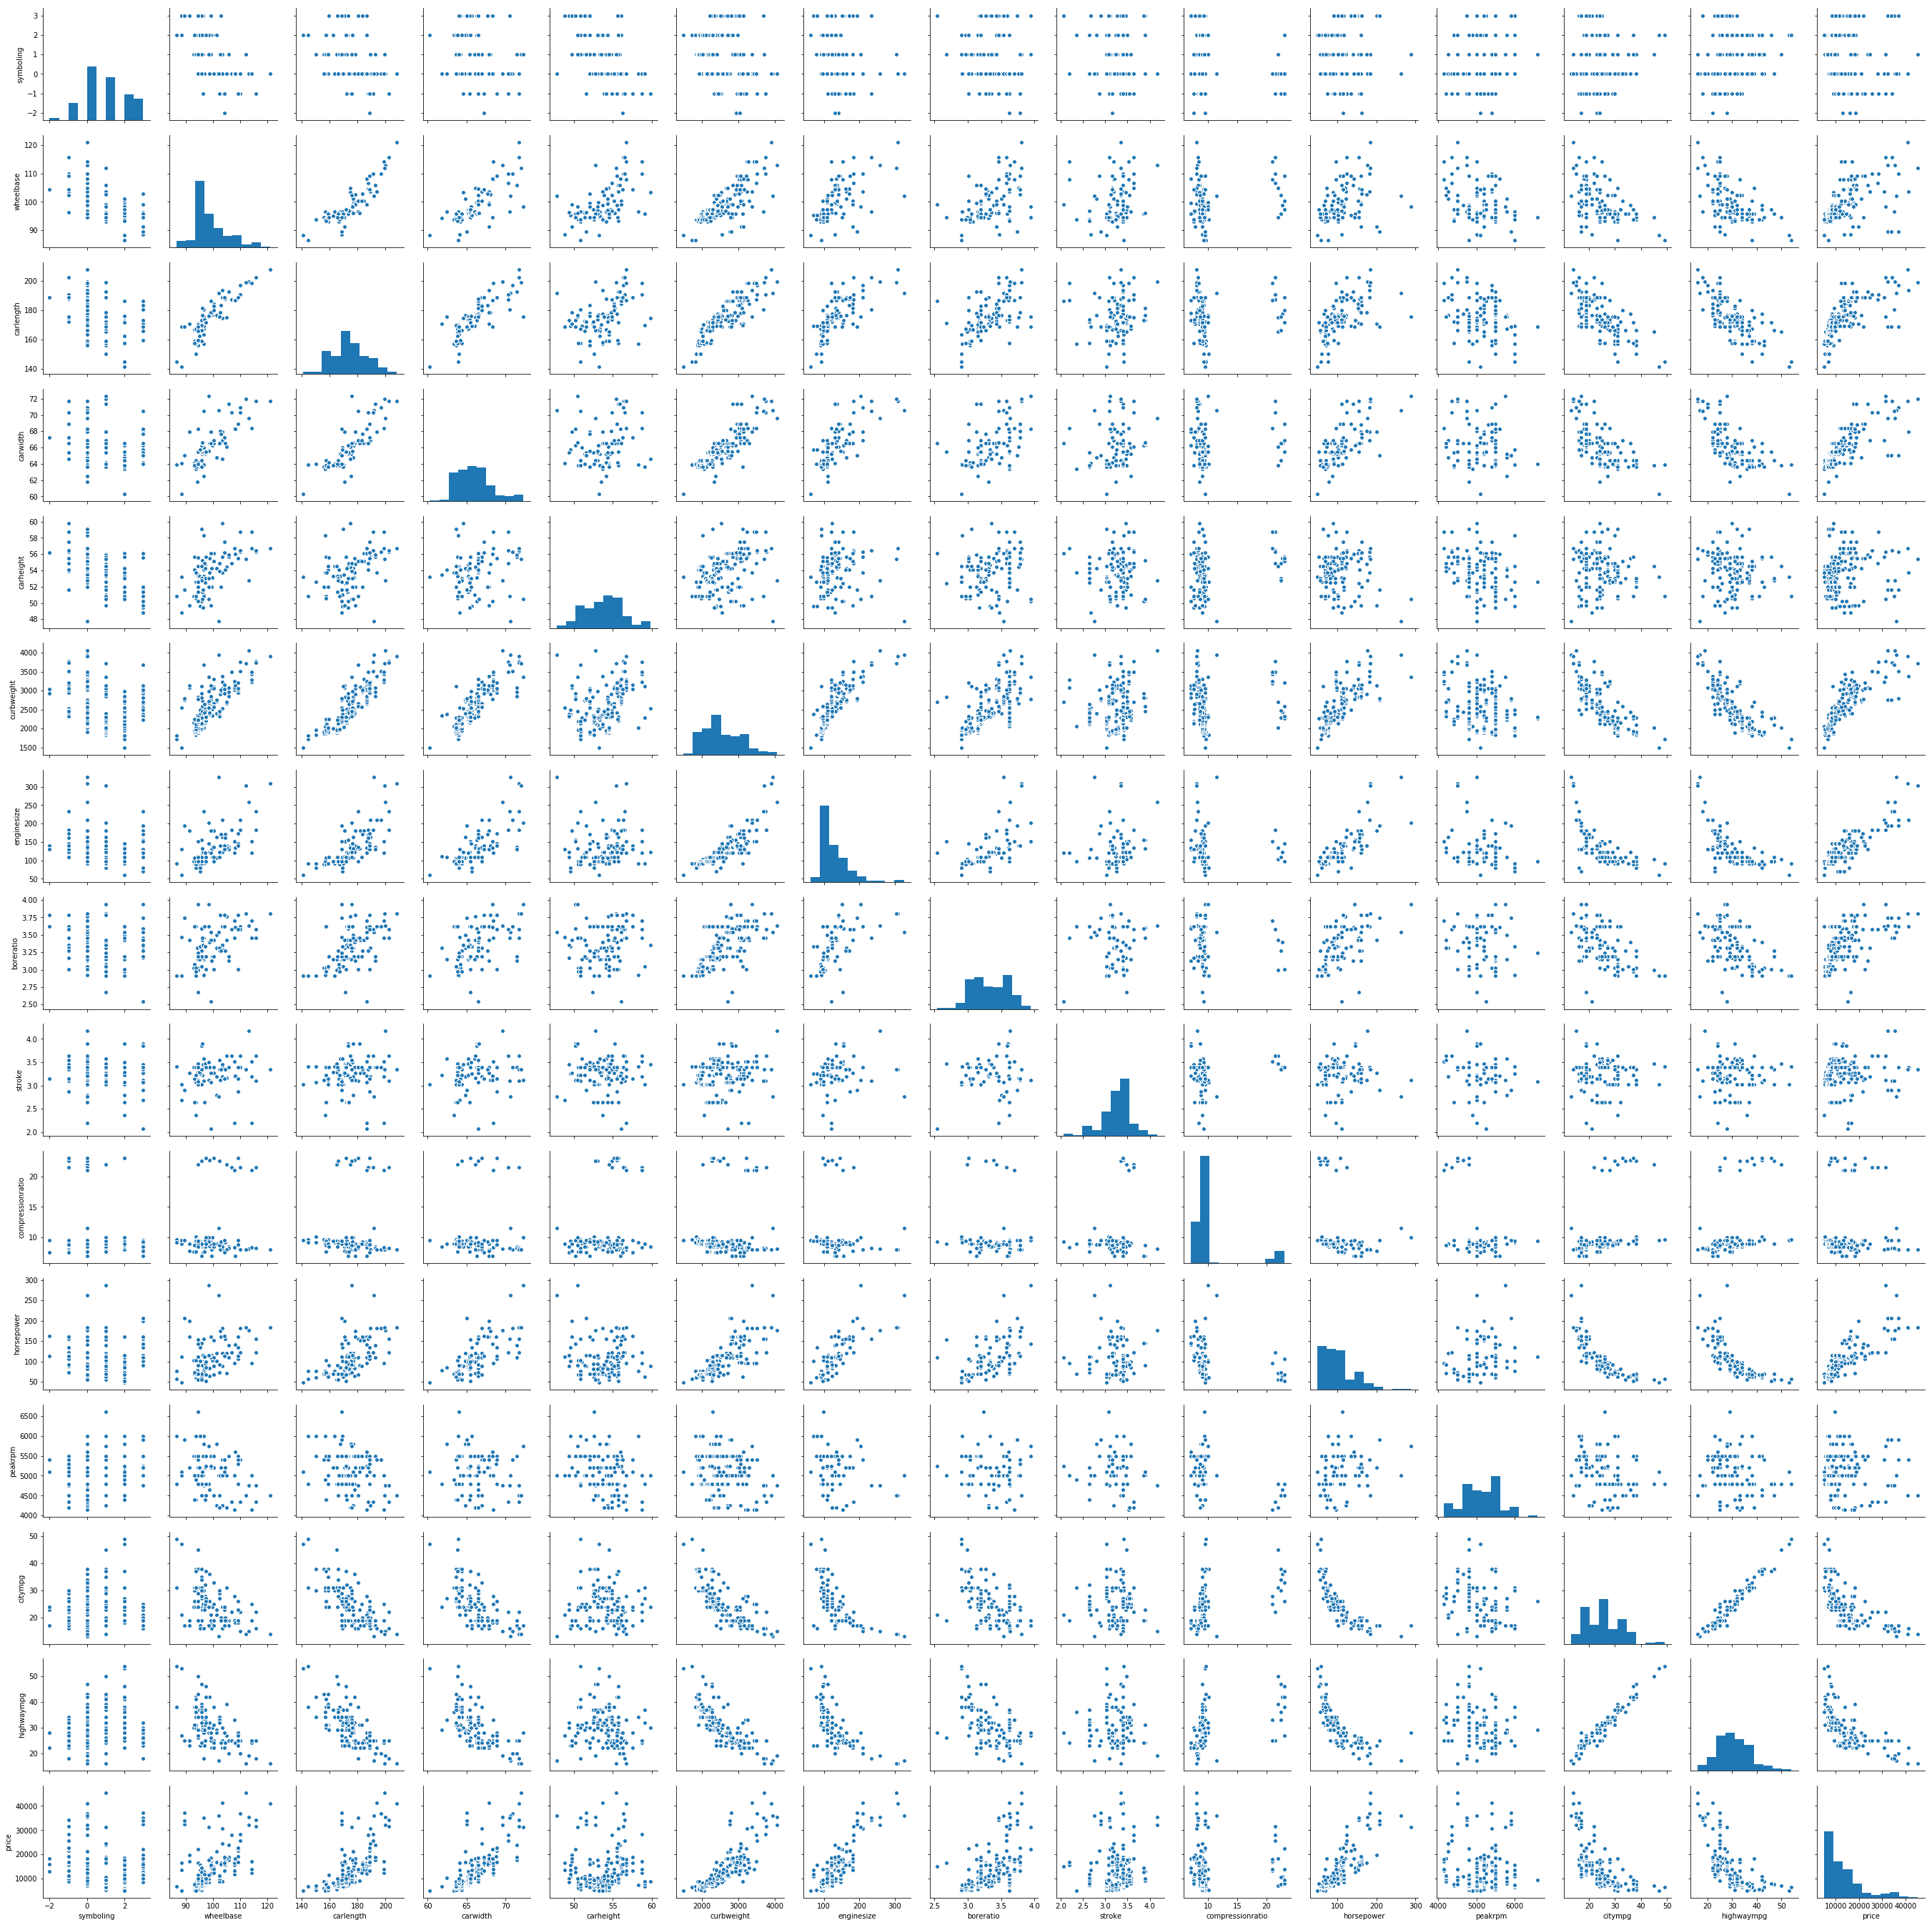

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will do a pairwise plot and compare the variables
sns.pairplot(car_price_df)
plt.show()

#### It can be seen that price has a good linear relation between lot of variables like carlength, carwidth,curbweight, enginesize, etc. But it is also to be noted that these variables are inturn have dependency between one another like highwaympg and citympg, enginesize and curbweight, etc. There are also some variables which are even negatively correlated like enginesize and highwaympg, enginesize and citympg, etc. 
#### So eventhough the variables are directly correlated to the price, we have to carefully analyze their impact in the presence of other variables.

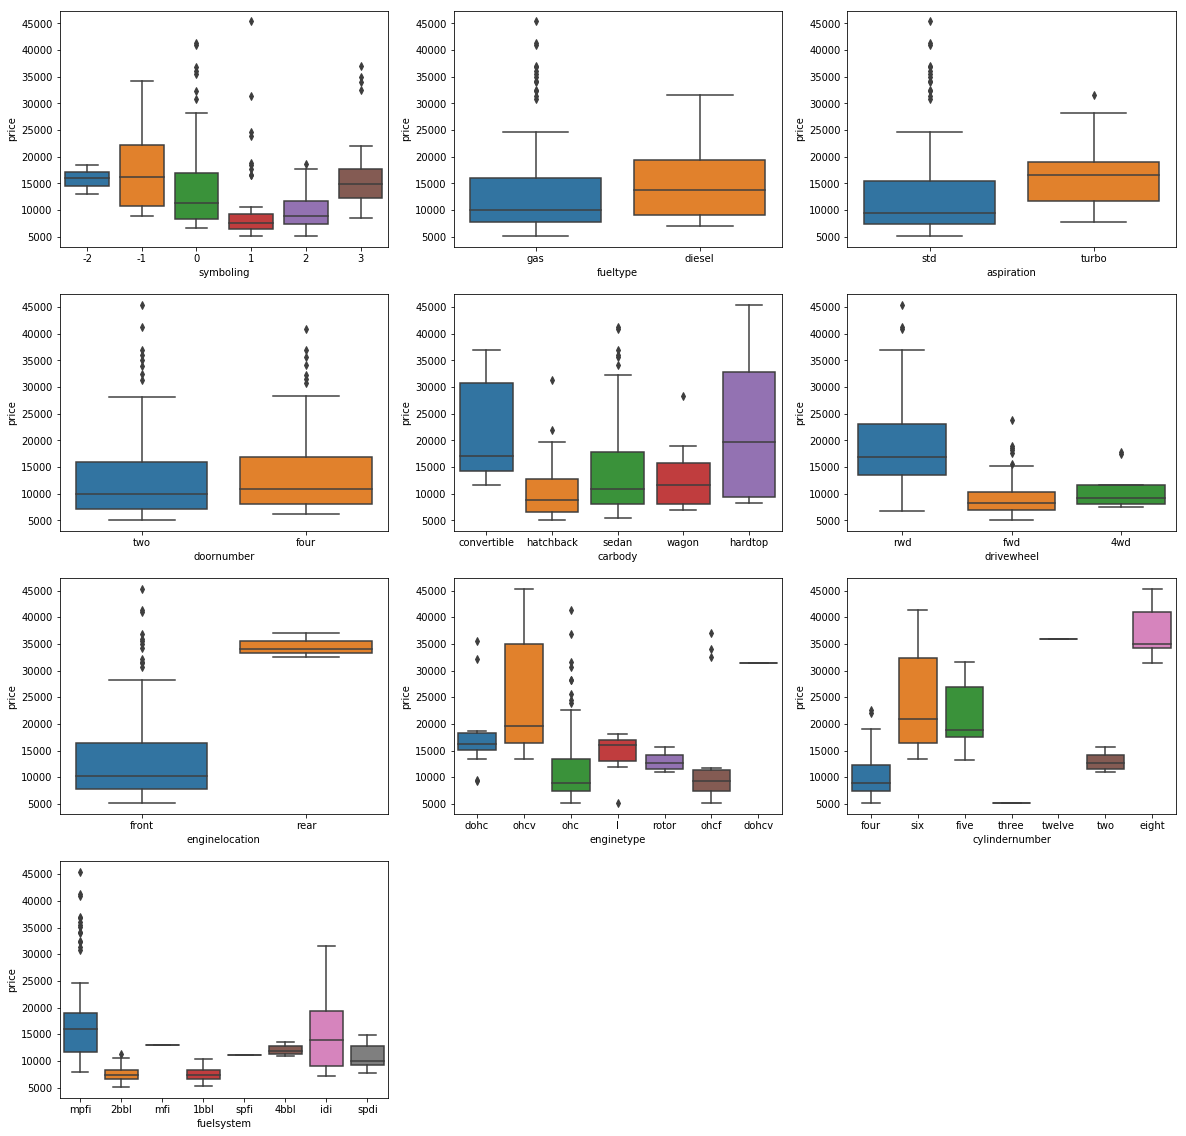

In [9]:
# Let's compare the categorical variables
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_price_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price_df)
plt.show()

#### It can be right away seen that enginelocation (front engine or rear engine) has a big impact on the price, also the number of cylinders, enginetype, fuelsystem has good impact on the car price. But the variables like doornumbers, aspiration, fueltype doesn't have much impact on the carprice. 

In [10]:
# Let's understand the data within the categorical columns
print(car_price_df.symboling.unique())
print(car_price_df.fueltype.unique())
print(car_price_df.aspiration.unique())
print(car_price_df.doornumber.unique())
print(car_price_df.carbody.unique())
print(car_price_df.drivewheel.unique())
print(car_price_df.enginelocation.unique())
print(car_price_df.enginetype.unique())
print(car_price_df.cylindernumber.unique())
print(car_price_df.fuelsystem.unique())

[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [11]:
# Since both doornumber and enginetype has similar values ('two' and 'four'), let's replace the ones in doornumber to something else
car_price_df['doornumber'] = car_price_df['doornumber'].str.replace('two', 'twodoor')
car_price_df['doornumber'] = car_price_df['doornumber'].str.replace('four', 'fourdoor')

In [12]:
print(car_price_df.symboling.unique())
print(car_price_df.fueltype.unique())
print(car_price_df.aspiration.unique())
print(car_price_df.doornumber.unique())
print(car_price_df.carbody.unique())
print(car_price_df.drivewheel.unique())
print(car_price_df.enginelocation.unique())
print(car_price_df.enginetype.unique())
print(car_price_df.cylindernumber.unique())
print(car_price_df.fuelsystem.unique())

[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['twodoor' 'fourdoor']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


#### The data looks good, having all unique values for various fields

In [13]:
car_price_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Data Preparation - fixing columns

#### CarName - The CarName field contains 2 parts, 'Car Company' and 'Car Model'. So let's split it into 2 columns namely CarCompany and CarModel

In [14]:
# split the CarName into 2
car_name_split_df = car_price_df["CarName"].str.split(" ", n = 1, expand = True)

In [15]:
# create 2 new columns CarCompany and CarModel and assign the splitted values into each of them respectively
car_price_df['CarCompany'] = car_name_split_df[0]
car_price_df['CarModel'] = car_name_split_df[1]

In [16]:
# We can drop the 'CarName' column from the dataset as we have created 'CarCompany' and 'CarModel' columns
car_price_df.drop(['CarName'], axis = 1, inplace=True)

In [17]:
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,3,gas,std,twodoor,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,twodoor,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,twodoor,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,fourdoor,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,fourdoor,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [18]:
# Let's analyse the values in CarCompany column
car_price_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### As we can see that for few companies there are multiple entries with different spelling like 'maxda' for 'mazda', 'vokswagen', 'vw' for 'volkswagen', 'toyouta' for 'toyota' and so on.
#### Let's modify these data so that we have one unique name for each of these car companies.

In [19]:
# replace mis spelled car names with correct ones 
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('maxda', 'mazda')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('Nissan', 'nissan')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('porcshce', 'porsche')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('toyouta', 'toyota')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('vokswagen', 'volkswagen')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('vw', 'volkswagen')

In [20]:
# Let's analyse the values in CarCompany column again
car_price_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### now we have unique names for all the car companies

In [21]:
cdf = car_price_df[['CarCompany', 'price']]
# cdf.sort_values(by=['price'], ascending=False)
pv = cdf.pivot_table(index='CarCompany', values='price', aggfunc='mean')
pv.sort_values(by=['price'], ascending=False)

,price
CarCompany,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


#### From the table above, we can categorize the companies into various groups to make the analysis easier

In [22]:
# Let's categorise carcompany as per the average prices, like < 10k as low, between 10k and 20k as mid, and above 20k as premium
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('chevrolet', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('dodge', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('plymouth', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('honda', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('subaru', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('isuzu', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('mitsubishi', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('renault', 'low')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('toyota', 'low')


car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('volkswagen', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('nissan', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('mazda', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('saab', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('peugeot', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('alfa-romero', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('mercury', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('audi', 'mid')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('volvo', 'mid')

car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('bmw', 'premium')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('porsche', 'premium')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('buick', 'premium')
car_price_df['CarCompany'] = car_price_df['CarCompany'].str.replace('jaguar', 'premium')

In [23]:
car_price_df['CarCompany'].unique()

array(['mid', 'premium', 'low'], dtype=object)

In [24]:
# Let's drop the 'CarModel' column as it is of not much use for building our model
car_price_df = car_price_df.drop(['CarModel'], axis=1)

### 4. Data Preparation - dummy variables

In [25]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'type'
type = pd.get_dummies(car_price_df['fueltype'])

# Check what the dataset 'type' looks like
type.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
# Let's drop the first column from type df using 'drop_first = True'
type = pd.get_dummies(car_price_df['fueltype'], drop_first = True)

# Add the results to the original housing dataframe
car_price_df = pd.concat([car_price_df, type], axis = 1)

In [27]:
# Now let's see the head of our dataframe.
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,gas
0,3,gas,std,twodoor,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,mid,1
1,3,gas,std,twodoor,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,mid,1
2,1,gas,std,twodoor,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,mid,1
3,2,gas,std,fourdoor,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,mid,1
4,2,gas,std,fourdoor,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,mid,1


In [28]:
# Drop the original 'fueltype' as we have created the dummies for it
car_price_df.drop(['fueltype'], axis = 1, inplace = True)

In [29]:
def CreateDummiesFor(field):
    global car_price_df
    temp_dummy = pd.get_dummies(car_price_df[field], drop_first = True)
    car_price_df = pd.concat([car_price_df, temp_dummy], axis = 1) 

In [30]:
# Let's do this for all the other categorical like aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem, CarCompany
CreateDummiesFor('aspiration')
CreateDummiesFor('doornumber')
CreateDummiesFor('carbody')
CreateDummiesFor('drivewheel')
CreateDummiesFor('enginelocation')
CreateDummiesFor('enginetype')
CreateDummiesFor('cylindernumber')
CreateDummiesFor('fuelsystem')
CreateDummiesFor('CarCompany')
CreateDummiesFor('symboling')

In [31]:
# Drop the original columns for which we have created the dummy variables above
car_price_df.drop(['aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany', 'symboling'], axis = 1, inplace = True)

In [32]:
car_price_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mpfi,spdi,spfi,mid,premium,-1,0,1,2,3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,0,0,1,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,1,0,0,0,0,1,0


#### Now we have a proper data to start with our modelling

### 5. Splitting the Data into Training and Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 6. Rescaling the Features
#### We will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
df_train.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',              'gas',
                  'turbo',          'twodoor',          'hardtop',
              'hatchback',            'sedan',            'wagon',
                    'fwd',              'rwd',             'rear',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   'five',             'four',              'six',
                  'three',           'twelve',              'two',
                   '2bbl',             '4bbl',              'idi',
                    'mfi',             'mpfi',             'spdi',
                   'spfi',              'mid',          'premi

In [36]:
# Apply scaler() to the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
# Let's look at the data after scaling
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,mpfi,spdi,spfi,mid,premium,-1,0,1,2,3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.440559,0.041958,0.0,0.412587,0.118881,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.498199,0.201198,0.0,0.494030,0.324786,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


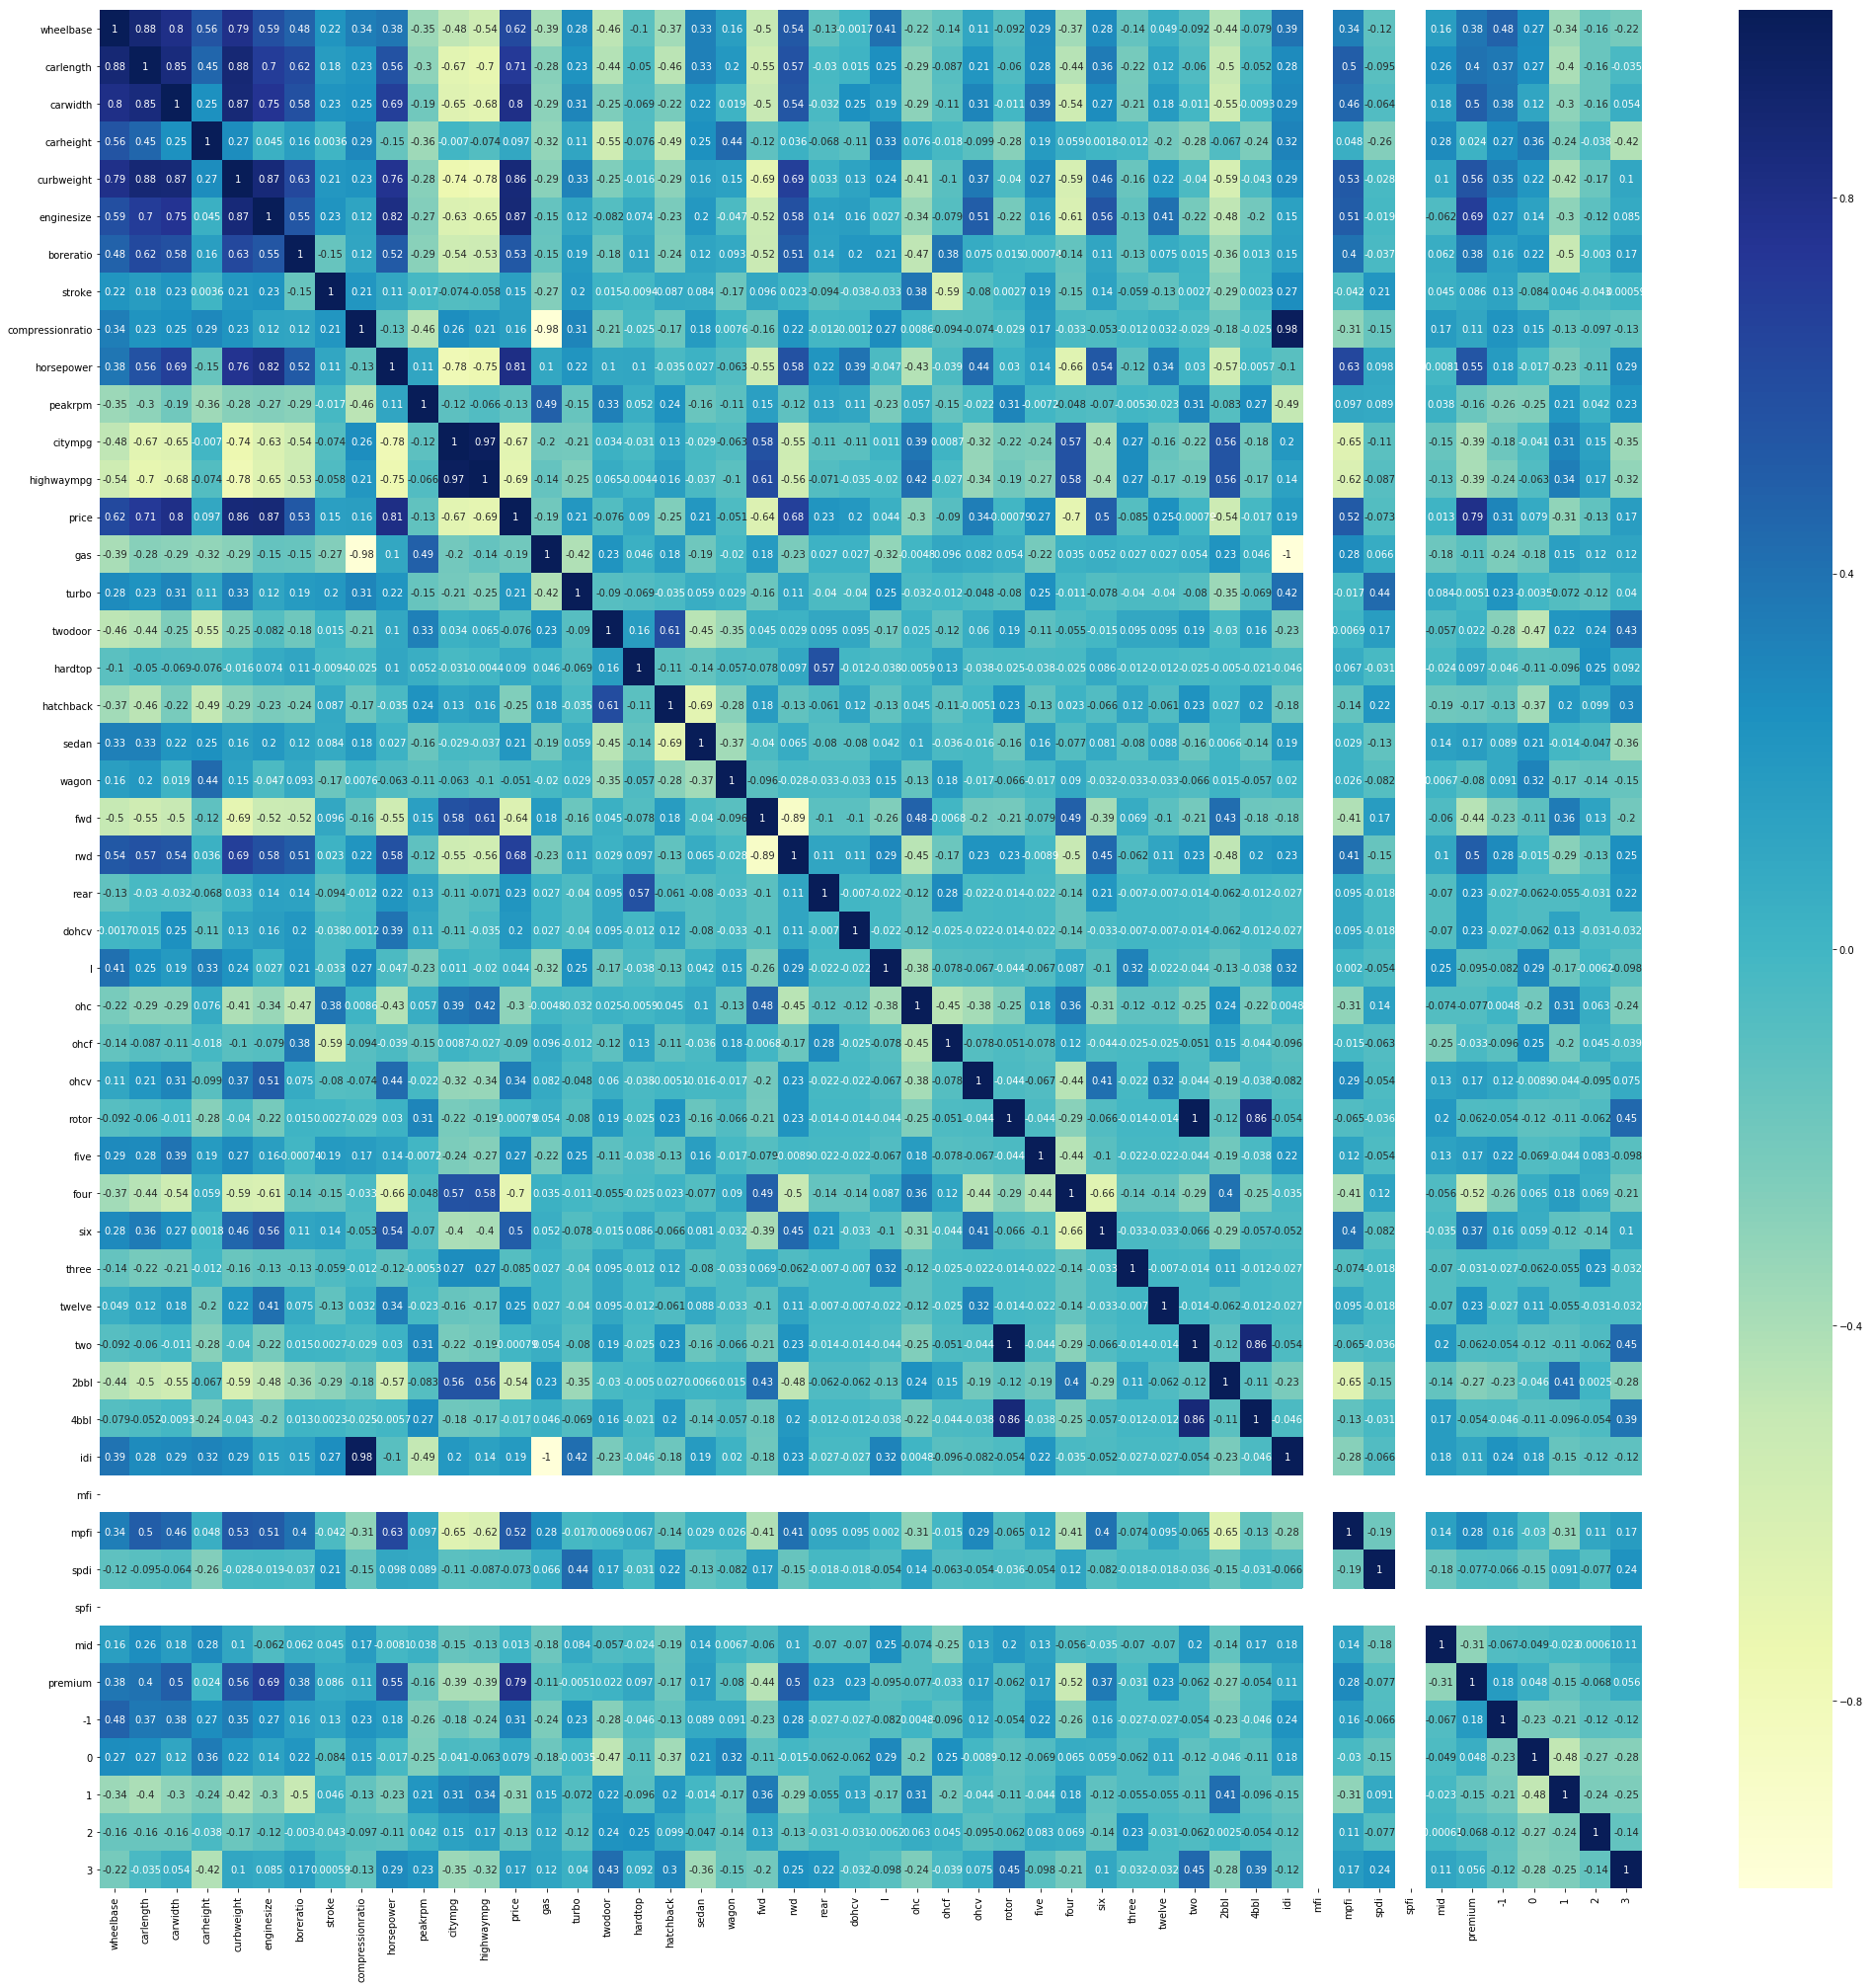

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 35))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### It can be seen that car price (target variable) is positively correlated with predictor variables like wheelbase, carlength, carwidth, curbweight, enginesize, etc and negatively correlated with citympg, highwaympg, etc. But the predictor variables also have high correlation between themselves

### 7. Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('price')
x_train = df_train

### 8. Building our model
#### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE - Recursive feature elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(x_train, y_train)

#### Building model using statsmodel, for the detailed statistics

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train = sm.add_constant(x_train)

In [43]:
# Running the linear model
lm = sm.OLS(y_train, x_train).fit()   

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     56.04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           9.98e-53
Time:                        10:53:53   Log-Likelihood:                 252.59
No. Observations:                 143   AIC:                            -413.2
Df Residuals:                      97   BIC:                            -276.9
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1551      0.142  

#### By considering all the available variables, we have got a good adjusted R-squared value of 0.946 and prob F-stat value nearly zero.
#### Though we can see that some of the variables have high p values (> 0.05) before removing them let's explore their VIF value and decide

#### Checking VIF

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,idi,inf
14,gas,inf
29,rotor,inf
35,two,inf
9,compressionratio,212.780000
6,enginesize,142.320000
31,four,116.810000
5,curbweight,48.820000
13,highwaympg,46.820000
12,citympg,45.800000


#### It's hard to judge the results with too many variables, so let's reduce the variables to 20 by running RFE and do the analysis again

In [47]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(x_train, y_train)

# running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(x_train, y_train)

In [48]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 29),
 ('wheelbase', False, 8),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', False, 16),
 ('highwaympg', False, 10),
 ('gas', False, 22),
 ('turbo', False, 14),
 ('twodoor', False, 28),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 23),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 18),
 ('ohc', True, 1),
 ('ohcf', False, 11),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('five', False, 20),
 ('four', False, 2),
 ('six', False, 21),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 25),
 ('4bbl', False, 27),
 ('idi', False, 24),
 ('mfi', False, 31),
 ('mpfi', False, 26),
 ('spdi', False, 13),
 ('spfi', False, 30),
 ('mid', False, 12

In [49]:
# columns having rfe support
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'rear', 'dohcv', 'ohc', 'ohcv', 'rotor', 'three', 'twelve',
       'two', 'premium'],
      dtype='object')

In [50]:
# columns not having rfe support
x_train.columns[~rfe.support_]

Index([     'const',  'wheelbase',  'carlength',  'carheight',    'peakrpm',
          'citympg', 'highwaympg',        'gas',      'turbo',    'twodoor',
              'fwd',        'rwd',          'l',       'ohcf',       'five',
             'four',        'six',       '2bbl',       '4bbl',        'idi',
              'mfi',       'mpfi',       'spdi',       'spfi',        'mid',
                 -1,            0,            1,            2,            3],
      dtype='object')

In [51]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [52]:
# Adding a constant variable  
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the linear model
lm = sm.OLS(y_train, x_train_rfe).fit()  
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.76e-70
Time:                        10:54:01   Log-Likelihood:                 230.50
No. Observations:                 143   AIC:                            -421.0
Df Residuals:                     123   BIC:                            -361.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0006      0.034  

#### Checking VIF

In [53]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,rotor,inf
19,two,inf
0,const,60.320000
3,enginesize,24.200000
2,curbweight,15.120000
10,sedan,10.570000
9,hatchback,10.110000
7,horsepower,8.580000
11,wagon,5.730000
1,carwidth,5.530000


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.946 | 0.942 |
| AIC | -413.2 | -421.0 |
| BIC | -276.9 | -361.7 |

#### Removing around 30 variables didn't impact the adjusted R squared value (0.946 to 0.942). Also the BIC value has reduced significantly.
#### By looking at the p-value and VIF, it is a good option to drop the variable `rotor` as it exhibits strong multicollinearity.

In [54]:
x_train_new = x_train_rfe.drop(["rotor"], axis = 1)

#### Let's rebuild the model without `rotor`

In [55]:
# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
# Running the linear model
lm = sm.OLS(y_train, x_train_lm).fit()   
# Let's see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.76e-70
Time:                        10:54:05   Log-Likelihood:                 230.50
No. Observations:                 143   AIC:                            -421.0
Df Residuals:                     123   BIC:                            -361.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0006      0.034  

#### Checking VIF

In [56]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.32
3,enginesize,24.20
2,curbweight,15.12
10,sedan,10.57
9,hatchback,10.11
7,horsepower,8.58
11,wagon,5.73
1,carwidth,5.53
19,premium,3.57
5,stroke,3.26


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.942 | 0.942 |
| AIC | -421.0 | -421.0 |
| BIC | -361.7 | -361.7 |

#### Removing `rotor` didn't impact the adjusted R squared value (infact its the same). Also the AIC, BIC values didn't change.
#### Now let's remove `enginesize` which has high p-value and high VIF value.

In [57]:
x_train_new = x_train_new.drop(["enginesize"], axis = 1)

In [58]:
# Adding a constant variable  
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.83e-69
Time:                        10:54:07   Log-Likelihood:                 224.60
No. Observations:                 143   AIC:                            -411.2
Df Residuals:                     124   BIC:                            -354.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.035  

In [59]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.32
2,curbweight,12.16
9,sedan,10.34
8,hatchback,9.83
6,horsepower,8.02
1,carwidth,5.53
10,wagon,5.31
13,ohc,2.85
3,boreratio,2.43
7,hardtop,2.36


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.942 | 0.937 |
| AIC | -421.0 | -411.2 |
| BIC | -361.7 | -354.9 |

#### Removing `enginesize` reduced the adjusted R squared value (by 0.05). Also the AIC, BIC values increased by a bit.
#### Let's remove `ohcv` which has a high p-value

In [60]:
x_train_new = x_train_new.drop(["ohcv"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.57e-70
Time:                        10:54:09   Log-Likelihood:                 224.52
No. Observations:                 143   AIC:                            -413.0
Df Residuals:                     125   BIC:                            -359.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0032      0.034  

In [61]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.30
2,curbweight,12.16
9,sedan,10.29
8,hatchback,9.81
6,horsepower,7.69
1,carwidth,5.48
10,wagon,5.28
13,ohc,2.64
7,hardtop,2.36
3,boreratio,2.17


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.937 | 0.938 |
| AIC | -411.2 | -413.0 |
| BIC | -354.9 | -359.7 |

#### Removing `ohcv` didn't change the Adj. R-squared value (decreased by 0.001). And the AIC, BIC values have also increased a bit. Since this is not of a much impact on the overall result, we will go ahead.
#### Next we will remove `hardtop` and rebuild the model.

In [62]:
x_train_new = x_train_new.drop(["hardtop"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.93e-70
Time:                        10:54:11   Log-Likelihood:                 222.40
No. Observations:                 143   AIC:                            -410.8
Df Residuals:                     126   BIC:                            -360.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0264      0.032  

In [63]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.26
2,curbweight,12.12
6,horsepower,7.68
8,sedan,6.84
7,hatchback,6.59
1,carwidth,5.48
9,wagon,3.83
12,ohc,2.61
3,boreratio,2.13
4,stroke,2.02


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.938 | 0.936 |
| AIC | -413.0 | -410.8 |
| BIC | -359.7 | -360.4|

#### Removing `hardtop` didn't impact the adjusted R squared value (decreased very slightly). And the AIC, BIC values have also increased a bit. 
#### Now the variable `rear` has a high p-value and seems to be less significant, so let's remove it and rebuild the model.

In [64]:
x_train_new = x_train_new.drop(["rear"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.07e-70
Time:                        10:54:12   Log-Likelihood:                 220.24
No. Observations:                 143   AIC:                            -408.5
Df Residuals:                     127   BIC:                            -361.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0109      0.032  

In [65]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.28
2,curbweight,10.98
6,horsepower,6.39
8,sedan,6.30
7,hatchback,6.00
1,carwidth,5.47
9,wagon,3.72
11,ohc,2.61
3,boreratio,2.11
4,stroke,2.02


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.936 | 0.935 |
| AIC | -410.8 | -408.5 |
| BIC | -360.4 | -361.1 |

#### Again removing `rear` didn't impact the adjusted R squared value (decreased by 0.001). And the AIC, BIC values haven't changed much. 
#### Let's remove `curbweight` and rebuild the model.

In [66]:
x_train_new = x_train_new.drop(['curbweight'], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)

# Running the linear model
lm = sm.OLS(y_train, x_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.13e-68
Time:                        10:54:12   Log-Likelihood:                 212.18
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     128   BIC:                            -349.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0226      0.033  

In [67]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
7,sedan,6.30
6,hatchback,5.96
5,horsepower,4.76
8,wagon,3.52
1,carwidth,3.22
10,ohc,2.42
2,boreratio,2.05
3,stroke,1.90
14,premium,1.78


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.935 |  0.928 |
| AIC | -408.5 | -394.4 |
| BIC | -361.1 | -349.9 |

#### Removing `curbweight` changed the adjusted R squared value (0.007). And the AIC, BIC values have also increassed. But these are not much significant impact.
#### Let's remove `ohc` rebuild the model.

In [68]:
x_train_new = x_train_new.drop(["ohc"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.23e-69
Time:                        10:54:13   Log-Likelihood:                 210.78
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     129   BIC:                            -352.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0064      0.032  

In [69]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.44
7,sedan,6.29
6,hatchback,5.95
5,horsepower,3.78
8,wagon,3.52
1,carwidth,3.22
2,boreratio,1.97
13,premium,1.61
4,compressionratio,1.47
3,stroke,1.43


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.928 | 0.927 |
| AIC | -394.4 |  -393.6 |
| BIC | -349.9 | -352.1 |

#### Removing `ohc` didn't affect the adjusted R squared value (decreased by 0.001). And the AIC, BIC values also didn't significantly change.
#### Let's remove the variable `two` which has high p-value and rebuild the model.

In [70]:
x_train_new = x_train_new.drop(["two"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.20e-70
Time:                        10:54:14   Log-Likelihood:                 209.49
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     130   BIC:                            -354.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0082      0.032  

In [71]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.39
7,sedan,6.28
6,hatchback,5.87
5,horsepower,3.77
8,wagon,3.52
1,carwidth,3.22
2,boreratio,1.97
12,premium,1.60
4,compressionratio,1.47
3,stroke,1.43


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.927 | 0.926 |
| AIC | -393.6 | -393.0 |
| BIC | -352.1 | -354.5 |

#### Removing `two` is not much of an impact on Adj. R-squared, AIC and BIC values.
#### Let's remove `stroke` as it is having a high p-value (> 0.05)

In [72]:
x_train_new = x_train_new.drop(["stroke"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.69e-70
Time:                        10:54:16   Log-Likelihood:                 207.89
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     131   BIC:                            -356.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0356      0.028  

In [73]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.80
6,sedan,6.23
5,hatchback,5.78
4,horsepower,3.65
7,wagon,3.52
1,carwidth,3.08
2,boreratio,1.70
11,premium,1.60
3,compressionratio,1.38
8,dohcv,1.26


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared |  0.926 | 0.925 |
| AIC | -393.0 | -391.8 |
| BIC | -354.5 | -356.2 |

#### Removing `stroke` is not much of an impact on Adj. R-squared, AIC and BIC values.
#### Let's remove `boreratio` as it is has a high p-value (>0.05)

In [74]:
x_train_new = x_train_new.drop(["boreratio"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           6.49e-71
Time:                        10:54:17   Log-Likelihood:                 206.59
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     132   BIC:                            -358.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0510      0.026  

In [75]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.74
5,sedan,6.15
4,hatchback,5.61
3,horsepower,3.51
6,wagon,3.51
1,carwidth,2.88
10,premium,1.60
2,compressionratio,1.38
7,dohcv,1.26
9,twelve,1.22


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared | 0.925 | 0.924 |
| AIC | -391.8 | -391.2 |
| BIC | -356.2 | -358.6 |

#### Again not much impact on Adj. R-squared, AIC and BIC values after removing `boreratio`.
#### Now let's remove `sedan` as it is has a high VIF value (>5)

In [76]:
x_train_new = x_train_new.drop(["sedan"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.04e-70
Time:                        10:54:19   Log-Likelihood:                 202.48
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1072      0.017  

In [77]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.32
3,horsepower,3.33
1,carwidth,2.70
9,premium,1.59
2,compressionratio,1.38
6,dohcv,1.26
4,hatchback,1.24
8,twelve,1.20
5,wagon,1.11
7,three,1.07


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared | 0.924 | 0.920 |
| AIC | -391.2 | -385.0 |
| BIC | -358.6 | -355.3 |

#### There is a bit of a decrease in Adj. R-squared and an increase in AIC and BIC values after removing `sedan`, but since it not much we will go ahead.
#### Let's remove `wagon` as it is has a high p-value (>0.05) after removing `sedan`.

In [78]:
x_train_new = x_train_new.drop(["wagon"], axis = 1)

# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.12e-71
Time:                        10:54:21   Log-Likelihood:                 202.01
No. Observations:                 143   AIC:                            -386.0
Df Residuals:                     134   BIC:                            -359.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1104      0.017  

In [79]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.89
3,horsepower,3.32
1,carwidth,2.70
8,premium,1.57
2,compressionratio,1.37
5,dohcv,1.26
7,twelve,1.20
4,hatchback,1.14
6,three,1.07


|  | Previous iteration | Current iteration |
| --- | --- | --- |
| Adj. R-squared | 0.920 | 0.920 |
| AIC | -385.0 | -386.0 |
| BIC | -355.3 | -359.4 |

#### Again not much impact on Adj. R-squared, AIC and BIC values after removing `wagon`'.

#### Now we can see, the VIFs and p-values both are within an acceptable range for all the selected variables. So we go ahead and make our predictions using this model only.

### 9. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
y_train_price = lm.predict(x_train_lm)

In [81]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

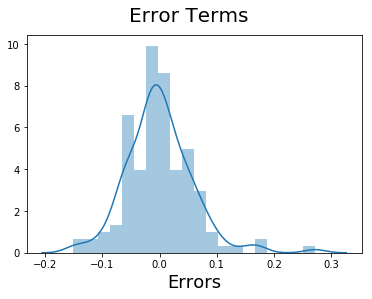

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### The error distribution follows a normal distribution to a good extent, except for the variance at the higher values. For now we will keep this model and do the prediction on the test set.

### 10. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

#### Apply scaler() to the test set

In [83]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into x_test and y_test

In [84]:
y_test = df_test.pop('price')
x_test = df_test

In [85]:
x_train_new = x_train_new.drop(['const'], axis=1)
# Now let's use our model to make predictions.

# Creating x_test_new dataframe by dropping variables from x_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [86]:
# Making predictions
y_pred = lm.predict(x_test_new)

### 11. Model Evaluation

Let's calculate the r2 score for the model

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9048537939194057

#### The r2 score is quite high (close to 1) which suggests that the predictability of the model is good.

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

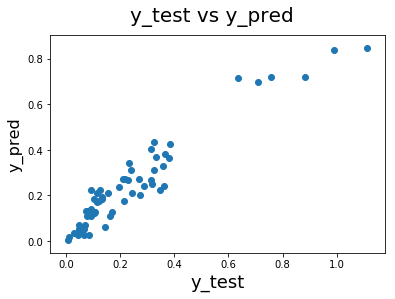

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

the equation of our best fitted line is:

$ price = 0.3302  \times  carwidth + 0.6270  \times  horsepower - 0.0348 \times hatchback - 0.3761 \times dohcv + 0.1321 \times three - 0.1776 \times twelve + 0.0899 \times compressionratio + 0.2734 \times premium $


Overall, we have a decent model